<h1>Document similarity - Question pair detection</h1>

# 1. Problem statment and dataset

# 2. Import Packages


In [ ]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 3. Exploratory Data Analysis

## <span style='color:BlueViolet'>3.1.Data Overview : </span>

In [ ]:
Quora = pd.read_csv('questions.csv')


In [ ]:
print(Quora.isna().sum())
Quora.dropna(inplace=True)
Quora

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404345,404345,789790,789791,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0


1. **id:** A unique identifier for each row in the dataset.

2. **qid1:** The identifier for the first question in a question pair.

3. **qid2:** The identifier for the second question in a question pair.

4. **question1:** The text of the first question in a pair.

5. **question2:** The text of the second question in a pair.

6. **is_duplicate:** A binary indicator (0 or 1) that denotes whether the two questions in a pair are considered duplicates (1) or not (0).

### 3.2. Data Distribution :

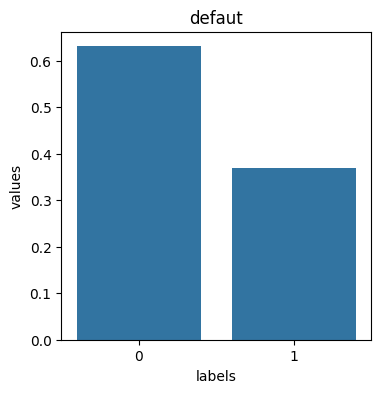

In [ ]:
temp = Quora.is_duplicate.value_counts()
df_class = pd.DataFrame({'labels': temp.index,
                   'values': temp.values/len(Quora)})
plt.figure(figsize = (4,4))
plt.title('defaut')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df_class)
locs, labels = plt.xticks()
plt.show()

Data is balanced here.


*   Non-duplicates - 64%
*   Duplicates - 36%



### 3.3. Text Length Distribution :

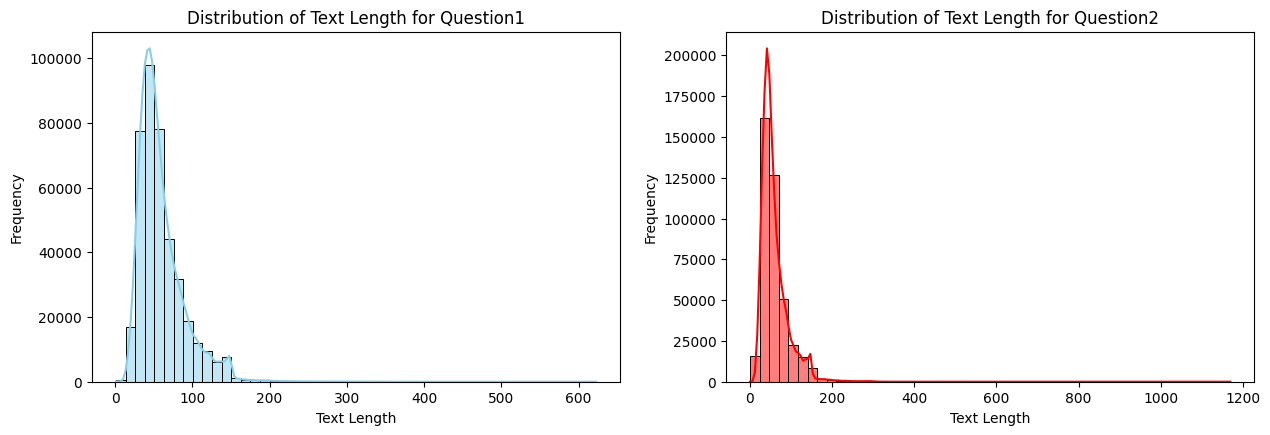

In [ ]:
# Text length distribution for question1
plt.figure(figsize=(15 ,10))
plt.subplot(2,2,1)
sns.histplot(data=Quora, x=Quora['question1'].astype('str').apply(len), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length for Question1')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
# Text length distribution for question2
plt.subplot(2,2,2)
sns.histplot(data=Quora, x=Quora['question2'].astype('str').apply(len), bins=50, kde=True, color='red')
plt.title('Distribution of Text Length for Question2')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# 4. Machine Learning Approach

## <span style='color:BlueViolet'>4.1.Logistic Regression: </span>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'processed_questions' contains preprocessed text
X = Quora[['question1', 'question2']]
y = Quora['is_duplicate']

# Combine 'question1' and 'question2' into a single string for each row
X['combined'] = X['question1'].astype(str) + ' ' + X['question2'].astype(str)

# Handle missing values by filling with an empty string
X['combined'] = X['combined'].fillna('')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X['combined'], y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Ensure the number of samples match
print(X_train_tfidf.shape, '  ', len(X_train))

# Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# Predictions
predictions = classifier.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, predictions))


(323477, 78031)    323477
Accuracy: 0.7569185111908
[[44626  6598]
 [13060 16586]]


The approach of **Logistic regression with TF-IDF technique** gives us the accuracy of 75%.

## <span style='color:BlueViolet'>4.2.XGBoots classifier : </span>

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'processed_questions' contains preprocessed text
X = Quora[['question1', 'question2']]
y = Quora['is_duplicate']

# Combine 'question1' and 'question2' into a single string for each row
X['combined'] = X['question1'].astype(str) + ' ' + X['question2'].astype(str)

# Handle missing values by filling with an empty string
X['combined'] = X['combined'].fillna('')
X_train, X_test, y_train, y_test = train_test_split(X['combined'], y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# XGBoost Classifier
classifier = XGBClassifier(verbose=1)

# Fit the model
classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
predictions = classifier.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, predictions))


Accuracy: 0.7550018548287375
[[45330  5894]
 [13919 15727]]


In this **XGBoost evaluation** also the model achieved 75% of accuracy.